In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# load data

In [2]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/hap_ang.zip'

-rw------- 1 root root 454140859 Nov  4 07:12 '/content/drive/My Drive/Colab Notebooks/datasets/hap_ang.zip'


In [3]:
!unzip /content/drive/MyDrive/Colab\ Notebooks/datasets/hap_ang.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: train/ang/006b56dc2f8cda2361e1b01b2496d6f352dd5b1790f0a9b0bfcbe540b292247d_┐й_20_║╨│ы_╡╡╜╔ ╚п░ц_20210130220916-008-003.jpg  
  inflating: train/ang/006b56dc2f8cda2361e1b01b2496d6f352dd5b1790f0a9b0bfcbe540b292247d_┐й_20_║╨│ы_╝ў╣┌ ╣╫ ░┼┴╓░°░г_20210130221139-010-001.jpg  
  inflating: train/ang/006b56dc2f8cda2361e1b01b2496d6f352dd5b1790f0a9b0bfcbe540b292247d_┐й_20_║╨│ы_╝ў╣┌ ╣╫ ░┼┴╓░°░г_20210130221139-010-004.jpg  
  inflating: train/ang/006b56dc2f8cda2361e1b01b2496d6f352dd5b1790f0a9b0bfcbe540b292247d_┐й_20_║╨│ы_╜║╞ў├ў ░№╢ў ╣╫ ╖╣└·╜├╝│_20210130220839-004-001.jpg  
  inflating: train/ang/007f299267a9d6a145f627e9993aeae4e8323652785a2f4d1b896f6489d3acc0_│▓_30_║╨│ы_░°░°╜├╝│_┴╛▒│_└╟╖с╜├╝│_20201202203951-001-002.jpg  
  inflating: train/ang/007f299267a9d6a145f627e9993aeae4e8323652785a2f4d1b896f6489d3acc0_│▓_30_║╨│ы_░°░°╜├╝│_┴╛▒│_└╟╖с╜├╝│_20201202203951-001-003.jpg  
  inflating: train/ang/007f299267a9d6a145f627e9993aeae4e8323652785a2f4d1b896f6489d

In [4]:
!ls -l

total 16
drwx------ 5 root root 4096 Nov  4 07:14 drive
drwxr-xr-x 1 root root 4096 Nov  1 13:35 sample_data
drwxr-xr-x 4 root root 4096 Nov  4 07:16 train
drwxr-xr-x 4 root root 4096 Nov  4 07:16 valid


In [5]:
train_dir = 'train'
valid_dir = 'valid'

# build model

## base

In [10]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 198, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 99, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 48, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 23, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 21, 128)      

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,200),
    batch_size=20,
    class_mode = 'binary')

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size = (150, 200),
    batch_size = 20,
    class_mode = 'binary')

Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch=200,
    epochs=20,
    validation_data=valid_generator,
    validation_steps=50)

Epoch 1/20
200/200 [==============================] - 103s 363ms/step - loss: 0.6941 - accuracy: 0.4980 - val_loss: 0.6790 - val_accuracy: 0.7080
Epoch 2/20
200/200 [==============================] - 73s 366ms/step - loss: 0.3755 - accuracy: 0.8355 - val_loss: 0.2464 - val_accuracy: 0.9020
Epoch 3/20
200/200 [==============================] - 73s 367ms/step - loss: 0.2683 - accuracy: 0.8997 - val_loss: 0.2120 - val_accuracy: 0.9040
Epoch 4/20
200/200 [==============================] - 73s 366ms/step - loss: 0.2220 - accuracy: 0.9215 - val_loss: 0.2044 - val_accuracy: 0.9200
Epoch 5/20
200/200 [==============================] - 74s 370ms/step - loss: 0.1945 - accuracy: 0.9268 - val_loss: 0.1899 - val_accuracy: 0.9290
Epoch 6/20
200/200 [==============================] - 75s 376ms/step - loss: 0.1628 - accuracy: 0.9385 - val_loss: 0.1932 - val_accuracy: 0.9200
Epoch 7/20
200/200 [==============================] - 73s 366ms/step - loss: 0.1491 - accuracy: 0.9452 - val_loss: 0.1718 - val_a

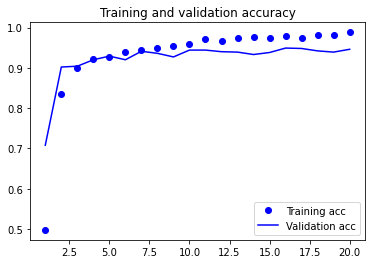

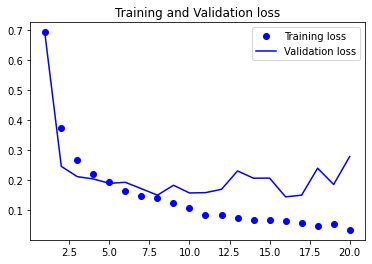

In [14]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [16]:
# 모델 저장

model.save('/content/drive/My Drive/Colab Notebooks/models/hap_ang_dropout.h5')